# Testing the `stellarflow` class

In [2]:
## Imports
import stellarflow as stf
import numpy as np

## Settings
AU, ED = stf.System._AU, stf.System._ED
print(30300./AU*ED)

0.017499714319129007


## Random Stars Initializations

In [70]:
## For Planet-System scale:
mean = 0
std_x = 10.
std_v = 0.05

## For Interstellar-System scale:
# mean = 0
# std_x = 1000.
# std_v = 1.

In [85]:
N_init = 10000
X0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_x)
V0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_v)
M0 = np.random.chisquare(df=1, size=N_init)

## Appending large gravitational center
# X0 = np.concatenate([X0, [3*[0.]]], axis=0)
# V0 = np.concatenate([V0, [3*[0.]]], axis=0)
# M0 = np.concatenate([M0, [1e9]], axis=0)

In [86]:
system = stf.System(X0, V0, M0, dt=1., smooth=1e-3)

In [87]:
system.simulation(500)

100%|██████████| 500/500 [04:10<00:00,  2.00it/s]


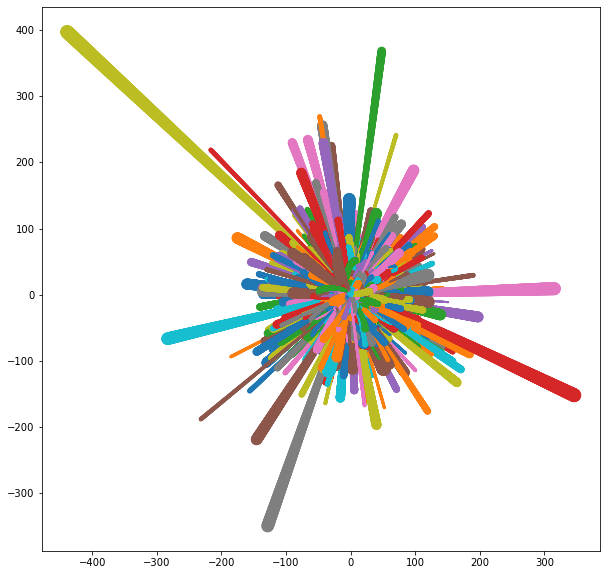

In [88]:
system.plot_history_2d(ZSIZE=True, SUBSET=False, n_sample=100)

In [84]:
# system.plot_history_3d()

## 2 Suns

In [34]:
X = np.array([
    [-1., 0., 0.], # Sun 
    [ 1., 0., 0.], # Sun 2
    [ 0., 0., 0.]  # Poor Planet
])

V = np.array([
    [0., -0.01, 0.], # Sun 
    [0.,  0.01, 0.], # Sun 2
    [ 0., 0.001, 0.001]   # Poor Planet
])

M = np.array([
    1.,  # Sun
    1.,  # Sun2
    1e-5 # Poor Planet
])

In [38]:
S2_system = stf.System(X, V, M, dt=1)

In [39]:
S2_system.simulation(3*365)

100%|██████████| 1095/1095 [00:02<00:00, 381.56it/s]


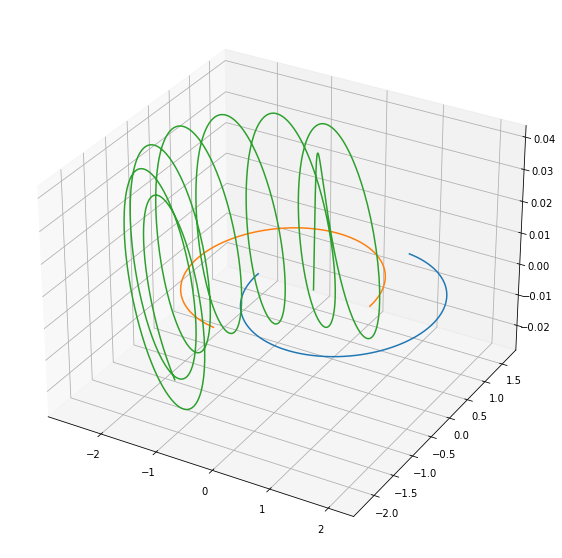

In [40]:
S2_system.plot_history_3d()

## Sun-Earth-Mars

In [13]:
X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [0., 1.524, 0.]  # Mars
])

V = np.array([
    [0.,           0., 0.], # Sun 
    [0., 29290./AU*ED, 0.],  # Earth
    [27070./AU*ED, 0., 0.],  # Mars
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    0.107 * 3.0025e-6  # Mars
])

In [14]:
SEM_system = stf.System(X, V, M)

In [15]:
SEM_system.simulation(3*365)

100%|██████████| 1095/1095 [00:03<00:00, 354.94it/s]


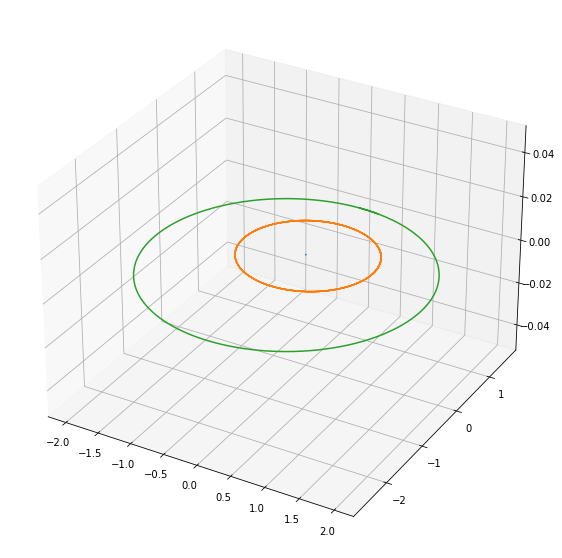

In [16]:
SEM_system.plot_history_3d()

## Earth Moon

In [53]:
X = np.array([
    [0., 0.,  0.], # Earth
    [383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0., 0.,          0.], # Earth
    [0., 1023./AU*ED, 0.]  # Moon
])

M = np.array([
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [59]:
EMo_system = stf.System(X, V, M, dt=0.01)

In [60]:
EMo_system.simulation(int(300))

100%|██████████| 300/300 [00:01<00:00, 271.98it/s]


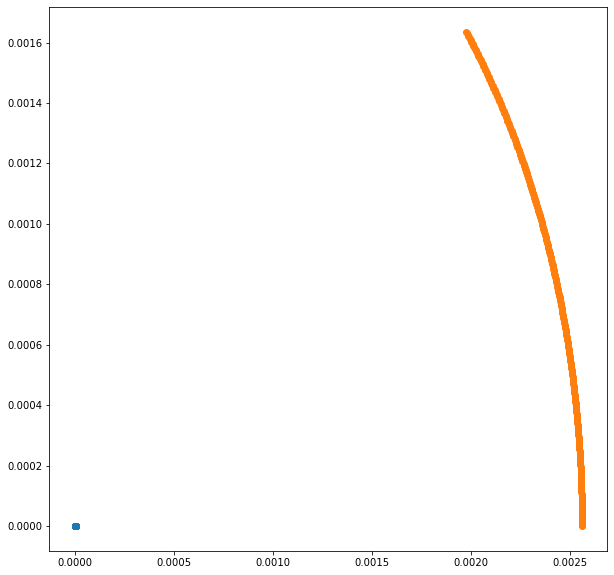

In [61]:
EMo_system.plot_history_2d()

## Sun Earth Moon

In [62]:
## Ecliptic tilt
sigma = 5. * np.pi / 180.

X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [1. + 383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0.,                     0., 0.], # Sun 
    [0.,           29290./AU*ED, 0.], # Earth
    [0., (29290. + 1023.)/AU*ED, 0.]  # Moon  # (29290. + 1023.*np.cos(sigma))/AU*ED, 1023.*np.sin(sigma)/AU*ED
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [63]:
SEMo_system = stf.System(X, V, M, dt=1)

In [64]:
SEMo_system.simulation(1*365)

100%|██████████| 365/365 [00:01<00:00, 273.61it/s]


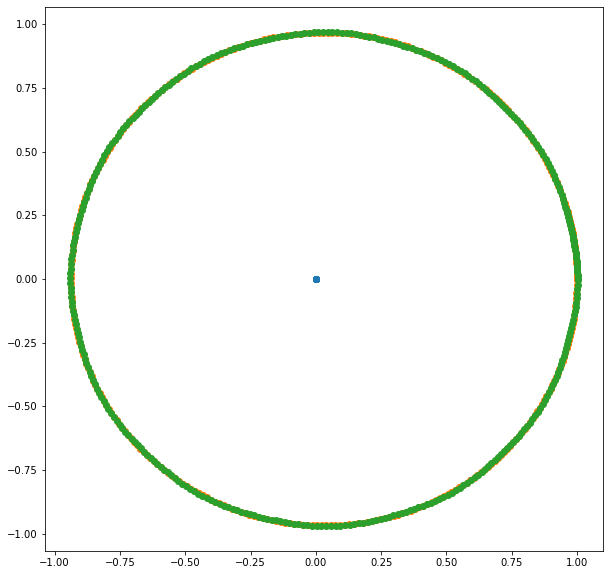

In [65]:
SEMo_system.plot_history_2d()

In [66]:
x_earth = SEMo_system._Q_hist[:, 1, :3]
x_moon  = SEMo_system._Q_hist[:, 2, :3]
x_diff = x_moon - x_earth

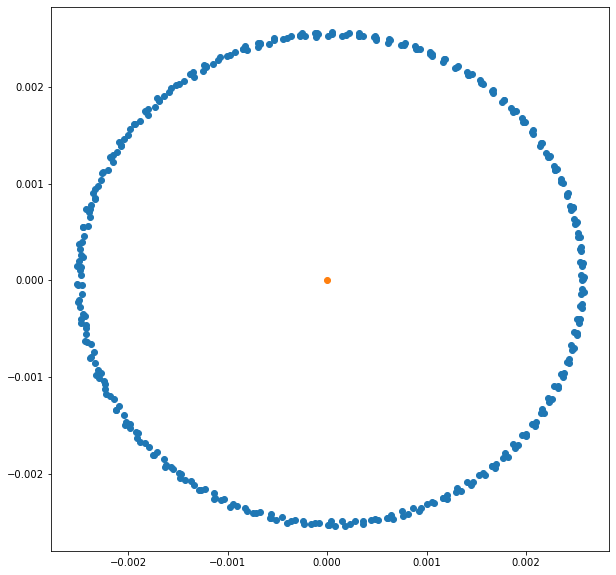

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(x_diff[:, 0], x_diff[:, 1])
plt.scatter(0, 0)
plt.show()